In [1]:
from pathlib import Path
import sys

cwd = Path.cwd()
project_root = cwd

if not (project_root / "src").exists():
    project_root = cwd.parent

sys.path.append(str(project_root))

print("Current working directory:", cwd)
print("Using project root:", project_root)
print("src exists:", (project_root / "src").exists())


Current working directory: /Users/mac/Desktop/Datalumina/PythonProjects/weights-vs-error/notebooks
Using project root: /Users/mac/Desktop/Datalumina/PythonProjects/weights-vs-error
src exists: True


In [2]:
import numpy as np

from src.data import make_synthetic_data
from src.model import predict_linear
from src.metrics import mse

from src.visualize import plot_data
from src.visualize import plot_predictions_for_ws
from src.visualize import compute_mse_vs_w
from src.visualize import plot_mse_vs_w


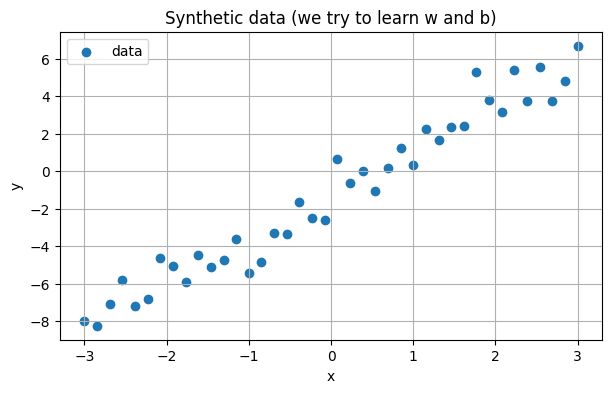

In [3]:
x, y = make_synthetic_data(n=40, true_w=2.5, true_b=-1.0, noise_std=1.0, seed=42)
plot_data(x, y, title="Synthetic data (we try to learn w and b)")


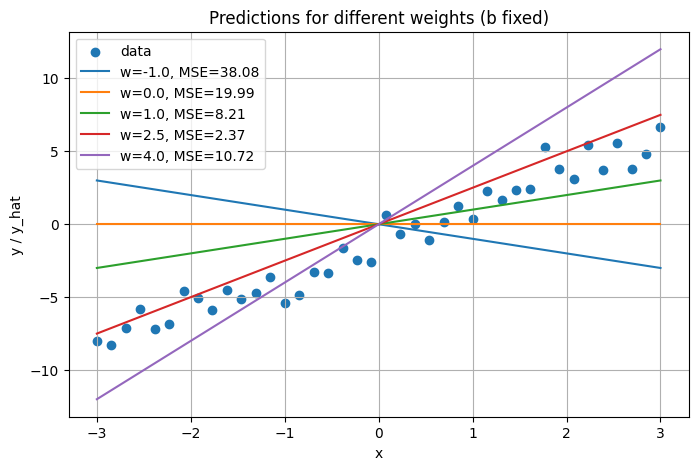

In [4]:
b_fixed = 0.0
w_list = [-1.0, 0.0, 1.0, 2.5, 4.0]
plot_predictions_for_ws(x=x, y=y, w_list=w_list, b_fixed=b_fixed)


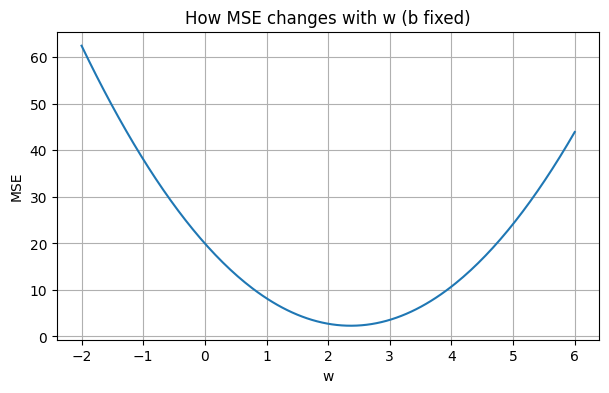

In [5]:
w_values = np.linspace(-2, 6, 200)
mse_values = compute_mse_vs_w(x=x, y=y, w_values=w_values, b_fixed=b_fixed)
plot_mse_vs_w(w_values=w_values, mse_values=mse_values, title="How MSE changes with w (b fixed)")


In [6]:
best_idx = int(np.argmin(mse_values))
best_w = float(w_values[best_idx])
best_mse = float(mse_values[best_idx])

print("Best w (b fixed):", best_w)
print("Best MSE:", best_mse)


Best w (b fixed): 2.381909547738694
Best MSE: 2.315377347194558


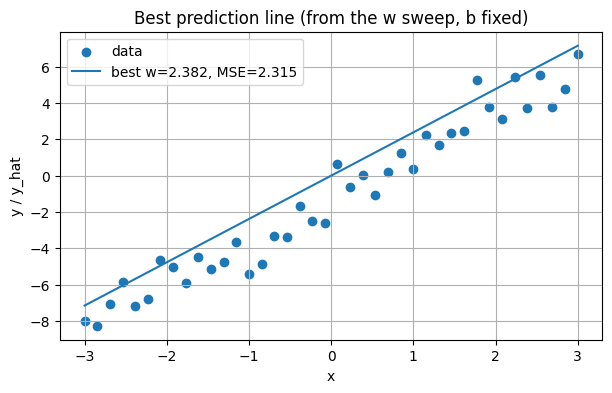

In [7]:
import matplotlib.pyplot as plt

y_hat_best = predict_linear(x, best_w, b_fixed)

plt.figure(figsize=(7, 4))
plt.scatter(x, y, label="data")
plt.plot(x, y_hat_best, label=f"best w={best_w:.3f}, MSE={best_mse:.3f}")
plt.title("Best prediction line (from the w sweep, b fixed)")
plt.xlabel("x")
plt.ylabel("y / y_hat")
plt.grid(True)
plt.legend()
plt.show()


In [8]:
from pathlib import Path
fig_dir = Path(project_root) / "outputs" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)
fig_dir


PosixPath('/Users/mac/Desktop/Datalumina/PythonProjects/weights-vs-error/outputs/figures')

In [9]:
plt.savefig(fig_dir / "01_best_line_b_fixed.png", dpi=200, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [13]:
plt.savefig(fig_dir / "01_mse_vs_w.png", dpi=200, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

In [11]:
import os
print(os.listdir(fig_dir))


['01_mse_vs_w.png', '01_best_line_b_fixed.png', 'reports']
